<a href="https://colab.research.google.com/github/Suraj5188/EDA_On_Companies_DataSet/blob/main/EDA_On_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Exploratory Data Analysis ?**

![](https://moriohcdn.b-cdn.net/ff3cc511fb.png)

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important

# **Problem Statement :**

**Problem statement is nothing but we have to find the uncover pattern from the given dataset.**

Let's do

# **Index:**

**1.  Lets Invite Some Libraries**

**2.  Mounting our Drive/Load dataset**

**3.  Dataset Information**

**4.  Data Cleaning/Wrangling**

**5.  Summary of Statistics**

**6.  Skewness and kurtosis**

**7.  Distributions of the variables/features**

**8.  Correlation**

**9.  Univariate Analysis**

**10. Bivariate Analysis**

**11. Data Visulization in detail**

**12. Conclusion**

# **1. Lets Invite Some Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# **2. Mounting our Drive**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Projects/companies.csv')

#**3. Dataset Information**

In [3]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [4]:
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


In [5]:
df.size

929152

In [6]:
df.shape

(66368, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [8]:
# We are converting funding_total_usd feature into float dtype

def fun(value):
  if value=='-':
    return np.nan
  else:
    value=float(value)
    return value

In [9]:
df['funding_total_usd']=df['funding_total_usd'].apply(fun)

In [10]:
# converting to datetime datatype

df['founded_at']=pd.to_datetime(df['founded_at'],errors = 'coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          66368 non-null  object        
 1   name               66367 non-null  object        
 2   homepage_url       61310 non-null  object        
 3   category_list      63220 non-null  object        
 4   funding_total_usd  53583 non-null  float64       
 5   status             66368 non-null  object        
 6   country_code       59410 non-null  object        
 7   state_code         57821 non-null  object        
 8   region             58338 non-null  object        
 9   city               58340 non-null  object        
 10  funding_rounds     66368 non-null  int64         
 11  founded_at         51143 non-null  datetime64[ns]
 12  first_funding_at   66344 non-null  object        
 13  last_funding_at    66368 non-null  object        
dtypes: dat

**Observation :**

* We could see that the features/column/fields and its data type, along with Null count
* funding_total_usd is now float dtype
* From given dataset we will be dropping some unwanted features in next EDA phase

* Also we converted founded_at object to datetime dtype 

#**4. Data Cleaning/Wrangling**

**Dealing with Missing Values**

In [12]:
df.isnull().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15225
first_funding_at        24
last_funding_at          0
dtype: int64

In [13]:
# Here we understanding the how many null values & their percentage

total=df.isnull().sum().sort_values(ascending=False)
percentage=(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
missing_data.head(14)

,Total,Percentage
founded_at,15225,0.229403
funding_total_usd,12785,0.192638
state_code,8547,0.128782
region,8030,0.120992
city,8028,0.120962
country_code,6958,0.104840
homepage_url,5058,0.076211
category_list,3148,0.047432
first_funding_at,24,0.000362
name,1,0.000015


**Observation :**

* We can observe that their are lot of missing values so we can't drop it
* We will handled this missing 'nan'  values by filling them
* Before that their are some features 'homepage_url','region' & 'permalink' we won’t be needing,so we will drop them from given dataset

In [15]:
# Dropping unwanted features from given dataset

df=df.drop(['homepage_url','permalink','region'],axis=1)

In [16]:
df.columns

Index(['name', 'category_list', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'city', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at'],
      dtype='object')

#**Now we deal with miising value**

In [17]:
df.isnull().sum()

name                     1
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
city                  8028
funding_rounds           0
founded_at           15225
first_funding_at        24
last_funding_at          0
dtype: int64

**1. Let's deal with category_list**

In [18]:
# Filling missing values for catgory list by mode

df['category_list'].fillna(df['category_list'].mode()[0],inplace=True)

**2. Now let's deal with funding_total_usd**

In [19]:
# Filling missing values for funding_total_usd by median

df['funding_total_usd'].fillna(df['funding_total_usd'].median(),inplace=True)

**3. Let's deal with country_code**

In [20]:
df['country_code'].value_counts()

USA    37601
GBR     3688
CAN     1925
IND     1596
CHN     1544
       ...  
BRN        1
BRB        1
IRN        1
MNE        1
MAF        1
Name: country_code, Length: 137, dtype: int64

**Observation :**

* We could see that 'USA' has most frequently occur so we fill with mode

In [21]:
# Filling missing values for country_code by mode

df['country_code'].fillna(df['country_code'].mode()[0],inplace=True)

**4. Let's deal with  state_code**

In [22]:
# Filling missing values for state_code by mode

df['state_code'].fillna(df['state_code'].mode()[0],inplace=True)

**5. Let's deal with city**

In [23]:
# Filling missing values for city by mode

df['city'].fillna(df['city'].mode()[0],inplace=True)

**6. Now it's time to deal with founded_at**

In [24]:
# Filling missing values for founded_at by mode

df['founded_at'].fillna(df['founded_at'].mode()[0],inplace=True)

**7. It's time to deal with**

In [25]:
# # Filling missing values for first_funding_at by mode

df['first_funding_at'].fillna(df['first_funding_at'].mode()[0],inplace=True)

**8.Still we have one i.e 'name' feature has contain 1 null value so will drop single row**

In [26]:
# In name feature only single row conatin null values so we will drop it them

df=df.dropna()

**Now we check is there any null values**

In [27]:
df.isnull().sum()

name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

**Observation :**

* We can see that their is no mising values in given dataset we had fill missing values or drop it

**We are done by handling missing value it's time to remove duplicates**

In [28]:
# Dropping dupicates from given dataset

df.drop_duplicates(inplace=True)

# **Before jumping on visulization let's do some clustering**

**clustering on category_list feature**

In [29]:
# clustering on category_list feature

catogory_lists=df['category_list'].value_counts(ascending=False)
catogory_lists

Software                                                                       7142
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

In [30]:
catogory_list_lessthan1000=catogory_lists[catogory_lists < 1000]
catogory_list_lessthan1000

Hardware + Software                                                            932
Health Care                                                                    930
Games                                                                          862
Enterprise Software                                                            845
Manufacturing                                                                  773
                                                                              ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel      1
Apps|Mobile|Private Social Networking                                            1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media             1
Content|SaaS|Social Media Marketing|Software                                     1
Consumer Goods|E-Commerce|Internet                                               1
Name: category_list, Length: 27290, dtype: int64

In [31]:
# Let's update them into dataset also

def fun1(n):
  if n in catogory_list_lessthan1000:
    return 'Others Catgory'
  else:
    return n

# Now apply function on given dataset

df['category_list']=df['category_list'].apply(fun1)

df['category_list'].value_counts()

Others Catgory      50917
Software             7142
Biotechnology        3615
E-Commerce           1332
Mobile               1177
Clean Technology     1133
Curated Web          1050
Name: category_list, dtype: int64

# **clustering on country_code**

In [32]:
# clustering on country_code

country_codes=df['country_code'].value_counts(ascending=False)
country_codes

USA    44557
GBR     3688
CAN     1925
IND     1596
CHN     1544
       ...  
BRN        1
BRB        1
IRN        1
MNE        1
MAF        1
Name: country_code, Length: 137, dtype: int64

In [33]:
country_codes_lessthan1000=country_codes[country_codes < 1000]
country_codes_lessthan1000

ISR    965
ESP    746
AUS    503
NLD    497
RUS    458
      ... 
BRN      1
BRB      1
IRN      1
MNE      1
MAF      1
Name: country_code, Length: 130, dtype: int64

In [34]:
# Let's update them into dataset also

def fun2(n):
  if n in country_codes_lessthan1000:
    return 'Others country'
  else:
    return n
  
# Now apply function on given dataset

df['country_code']=df['country_code'].apply(fun2)

df['country_code'].value_counts()

USA               44557
Others country    10839
GBR                3688
CAN                1925
IND                1596
CHN                1544
FRA                1135
DEU                1082
Name: country_code, dtype: int64

**Observation :**

* Here we did clustering on catgory & country_code that have less than 1000 based on value counts 

# **5. Summary of Statistics**

In [35]:
display(df.describe().round(2))

,funding_total_usd,funding_rounds
count,6.636600e+04,66366.00
mean,1.530463e+07,1.73
std,1.690634e+08,1.36
min,1.000000e+00,1.00
25%,5.300000e+05,1.00
50%,2.000000e+06,1.00
75%,6.800818e+06,2.00
max,3.007950e+10,19.00


# **6.Skewness and kurtosis**

**Skewness & Kurtosis for 'funding_rounds' feature**

In [36]:
# Skewness
print('Skewness : {}'.format(df['funding_rounds'].skew().round(3)))

# kurtosis
print('Kurtosis : {}'.format(df['funding_rounds'].kurt().round(4)))

Skewness : 3.045
Kurtosis : 13.9779


# **7. Distributions of the variables/features**

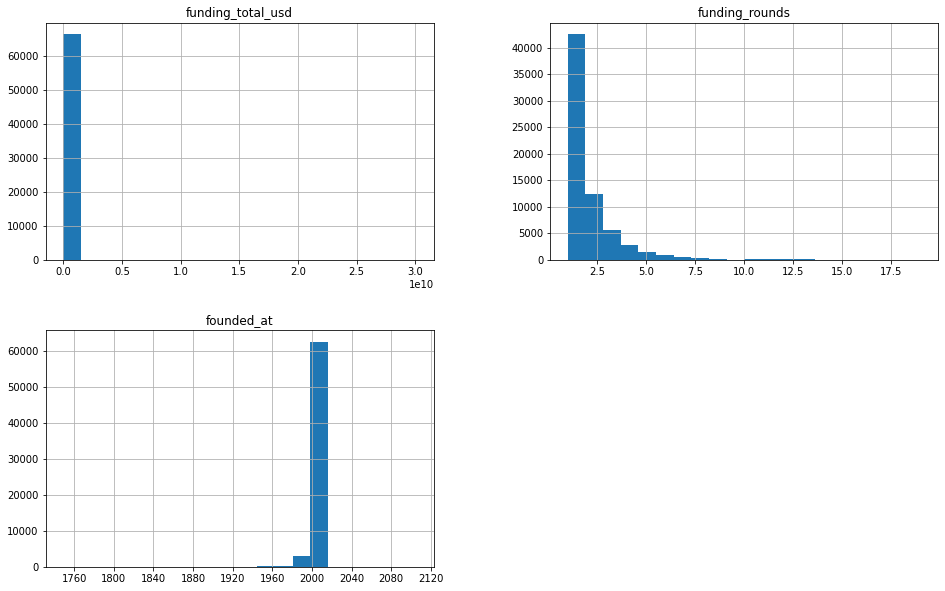

In [37]:
df.hist(figsize=(16,10),bins=20)
plt.show()

**Observation :**
* Every company get funding_total_usd their we can observe their is 0 companies they don't get funding.

* The most funding rounds are 4

#**8.Correlation**

**By Heatmap the relationship between the numerical features**

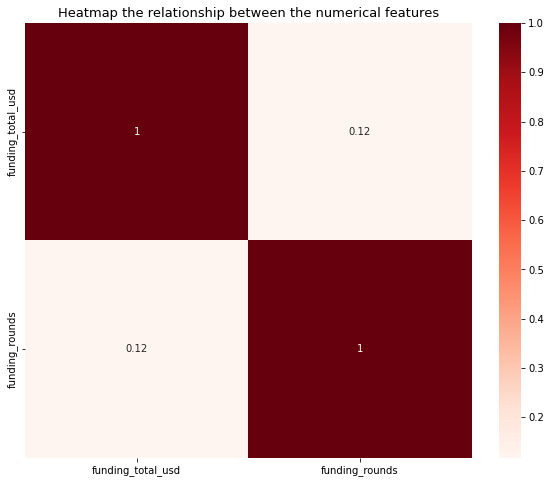

In [38]:
plt.rcParams['figure.figsize']=(10,8)

sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

plt.title('Heatmap the relationship between the numerical features',fontsize=13)
plt.show()

**Observation :**

* Dark color represents a positive correlation between funding_total_usd & funding_rounds.
* Light color/ white is a towards the negative correlation funding_total_usd & funding_rounds.

In [39]:
df.columns

Index(['name', 'category_list', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'city', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at'],
      dtype='object')

In [40]:
df['founded_at'].value_counts()

2012-01-01    17955
2011-01-01     2495
2013-01-01     2471
2010-01-01     2109
2009-01-01     1796
              ...  
2003-02-15        1
2008-09-26        1
1986-01-16        1
2009-08-16        1
2006-10-27        1
Name: founded_at, Length: 3974, dtype: int64

# **Now data is clean**

# **It's time to data visulization**

# **9 .Univariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'univariate analysis basically tells us how data in each feature is distributed')

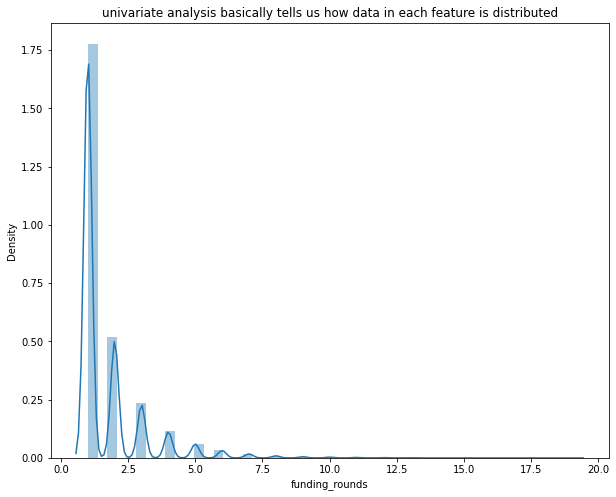

In [41]:
# The univariate analysis basically tells us how data in each feature is distributed

sns_plot = sns.distplot(df['funding_rounds'])
plt.title('univariate analysis basically tells us how data in each feature is distributed')

**Observation :**

* The data is distributed by funding rounds from 1 to 19.

# **10. Bivariate Analysis :**

<Figure size 1400x1120 with 0 Axes>

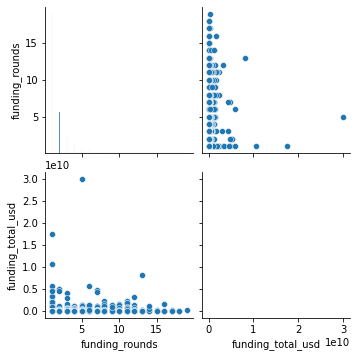

In [42]:
# Grouping variables
var=['funding_rounds','funding_total_usd']

# scatter plot
plt.figure(dpi=140)
sns.pairplot(df[var])
plt.show()

In [43]:
df.columns

Index(['name', 'category_list', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'city', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at'],
      dtype='object')

# **11. Data Visuilization in detail**

**Finding Top catgory_list companies**

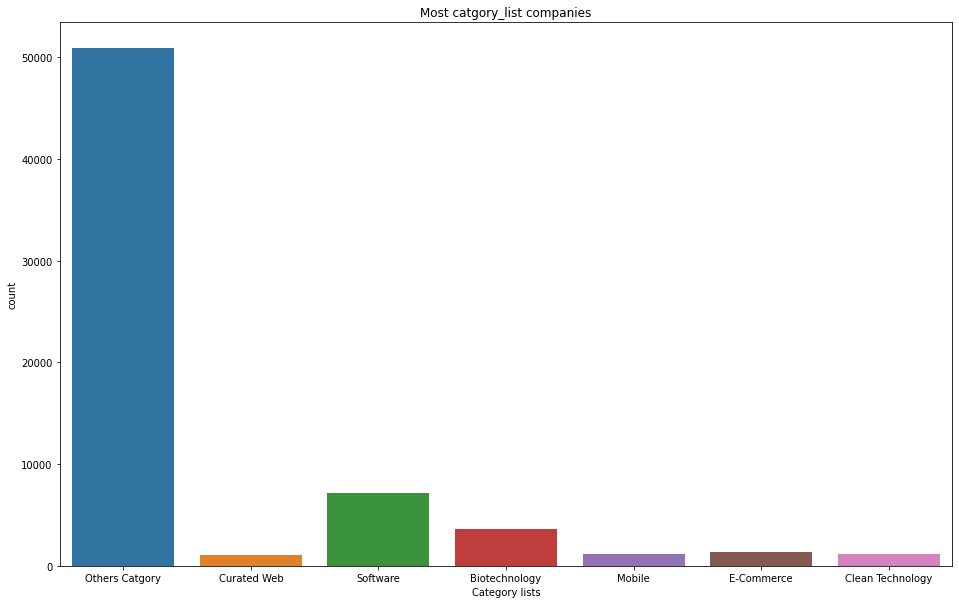

In [44]:
plt.rcParams['figure.figsize']=(16,10)

sns.countplot(x='category_list',data=df)

plt.title('Most catgory_list companies')

plt.xlabel('Category lists')
plt.show()

In [45]:
catogory_lists_names=df.category_list.value_counts().index
catogory_lists_names

Index(['Others Catgory', 'Software', 'Biotechnology', 'E-Commerce', 'Mobile',
       'Clean Technology', 'Curated Web'],
      dtype='object')

In [46]:
catogory_lists_values=df.category_list.value_counts().values
catogory_lists_values

array([50917,  7142,  3615,  1332,  1177,  1133,  1050])

**Observation:**

* Software catgory has around 9,000 companies.
* Biotechnoly catgory has around 7,000 companies.
* Also, E Commerce catgory has around 1,500 companies.
* In Others catgory are more than 50,000 companies.

**TOP 3 catgories list of companies by percentage**

([<matplotlib.patches.Wedge at 0x7f3c4964c1c0>,
 [Text(-0.9389551453785004, 0.5730298726656747, 'Others Catgory'),
  Text(0.8181563937368244, -0.7352687368490207, 'Software'),
  Text(1.0814028356726388, -0.20141476360777524, 'Biotechnology')],
 [Text(-0.5121573520246365, 0.31256174872673165, '82.56%'),
  Text(0.4462671238564496, -0.40105567464492037, '11.58%'),
  Text(0.5898560921850756, -0.10986259833151375, '5.86%')])

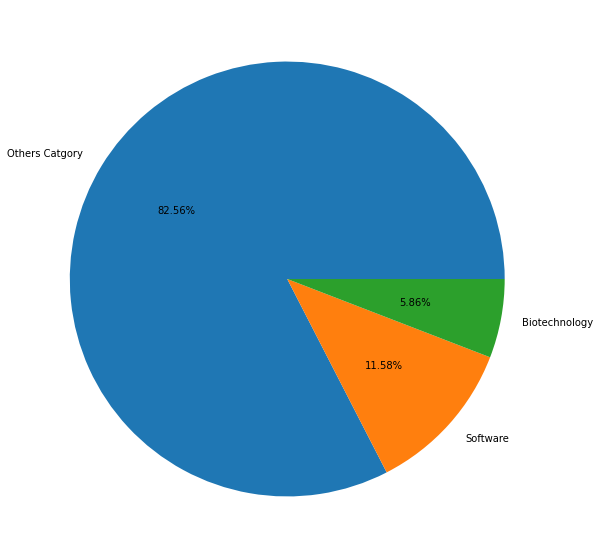

In [47]:
# pie plot

plt.pie(catogory_lists_values[:3],labels=catogory_lists_names[:3],autopct='%1.2f%%')

**Observation :**

* We can observe that biotechnology has 5.86%  
* software has 11.58% they are top 2 catgories

**Box plot OR Whiskers plot**

**Box plot of Funding rounds Vs status**

Text(0.5, 1.0, 'Box plot of Funding rounds Vs status')

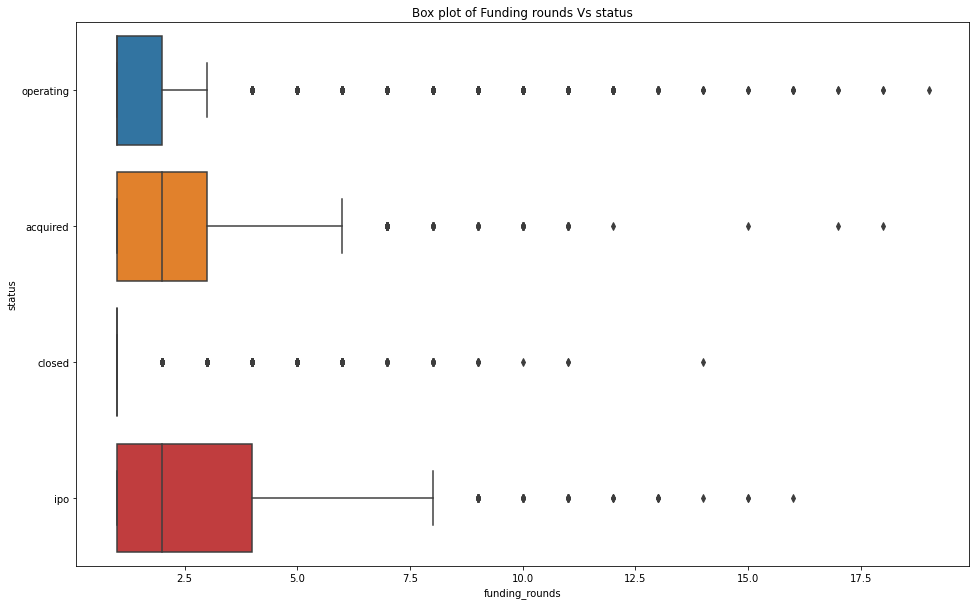

In [48]:
sns.boxplot(x='funding_rounds',y='status',data=df)
plt.title('Box plot of Funding rounds Vs status')

**Observation :**

* Boxplot of "Operating" had only 75th percentile value at funding rounds and the 25th and 50th percentiles are overlapped. 

* Boxplot of "acquired" had only 75th percentile value at funding rounds, 50th percentile value at 3 rounds

* Boxplot of "closed" had only value at 1 rounds

* Boxplot of "ipo" had 75th percentile value at funding rounds, 50th percentile value at 1 rounds

**Funding Rounds Range by histplot**

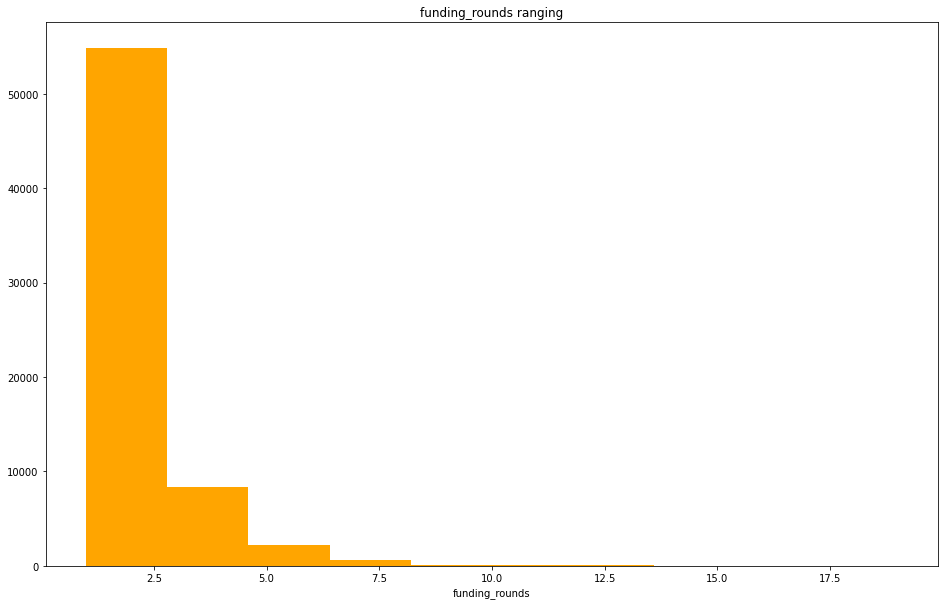

In [49]:
plt.hist(df['funding_rounds'],color='orange')
plt.title("funding_rounds ranging")
plt.xlabel("funding_rounds")
plt.show()

**Most Comapnies Founded at which year**

In [50]:
founded_ats=(df['founded_at'].dt.year).value_counts().index
founded_ats

Int64Index([2012, 2013, 2011, 2014, 2010, 2009, 2008, 2007, 2006, 2015,
            ...
            1909, 1857, 1896, 2041, 1905, 1872, 1845, 1916, 1855, 1831],
           dtype='int64', length=176)

In [51]:
founded_values=(df['founded_at'].dt.year).value_counts().values
founded_values

array([21650,  6259,  5623,  4964,  4252,  3323,  2626,  2531,  1967,
        1578,  1559,  1281,  1080,  1076,   949,   911,   909,   571,
         458,   400,   271,   193,   176,   149,   117,   116,   112,
          92,    91,    90,    83,    76,    69,    49,    47,    47,
          42,    30,    27,    23,    23,    22,    21,    17,    17,
          16,    15,    14,    12,    11,    11,     9,     9,     9,
           8,     7,     7,     6,     6,     6,     6,     6,     5,
           5,     5,     5,     5,     5,     4,     4,     4,     4,
           4,     4,     4,     4,     4,     4,     4,     4,     4,
           4,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     1,

Text(0.5, 1.0, 'Most Comapnies Founded at which year')

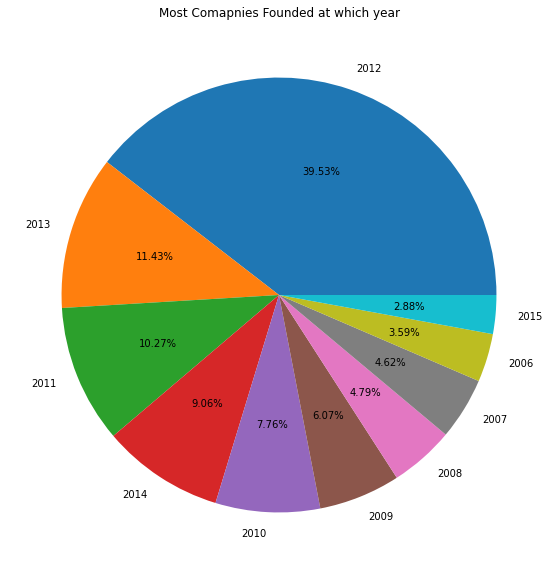

In [52]:
plt.rcParams['figure.figsize']=(16,10)
plt.pie(founded_values[:10],labels=founded_ats[:10],autopct='%1.2f%%')
plt.title('Most Comapnies Founded at which year')

**Observation :**

* Most Companies founded in 2012 around 39.53%

* In 2013 & 2010 around 11.43% are founded.

* Also,before 2014 around 1-9% companies are founded.

**WordCloud visual representation of word frequency of catgory_list**

**Most of the funding usd by companies catgory wise**

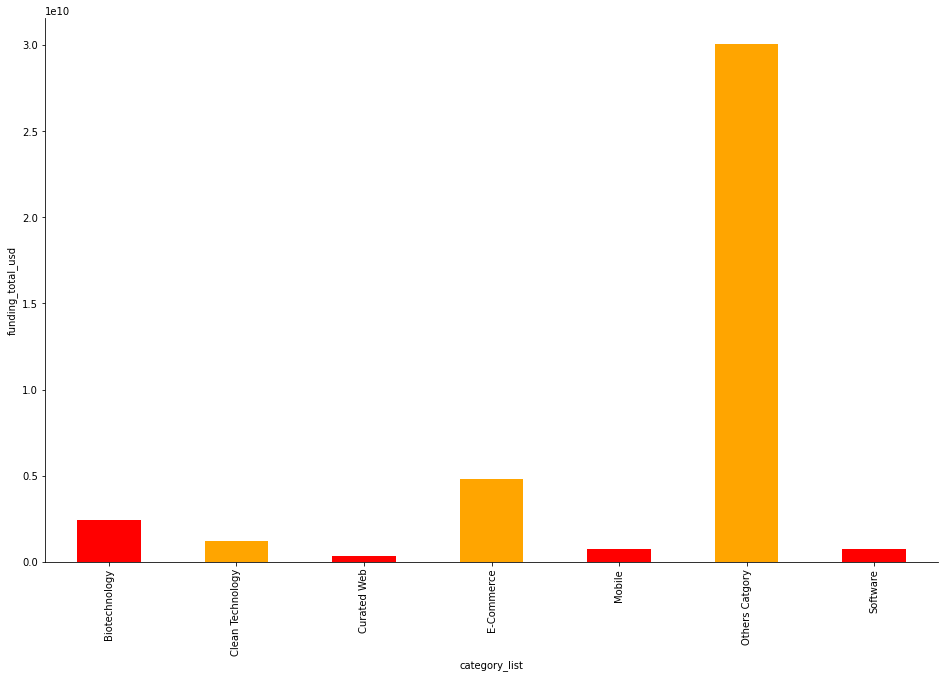

In [53]:
# Most of the funding usd by companies catgory wise

plt.figure(figsize=(16,10))
df.groupby('category_list')['funding_total_usd'].max().plot.bar(color=['red','orange'])
plt.ylabel('funding_total_usd')
sns.despine()
plt.show()

**Observation :**

* E-Commerce catgories got maximum funding total usd
* Followed by biotechnology has 2nd highest one that they got funding total usd
* Clean technology has 3rd highest catgory that got funding total usd
* Mobile & softwre catgories got same funding total usd
* Curated web is the most lowest catgories that got lowest funding usd

**Total count of company status**

Text(0.5, 1.0, 'Total count of company status')

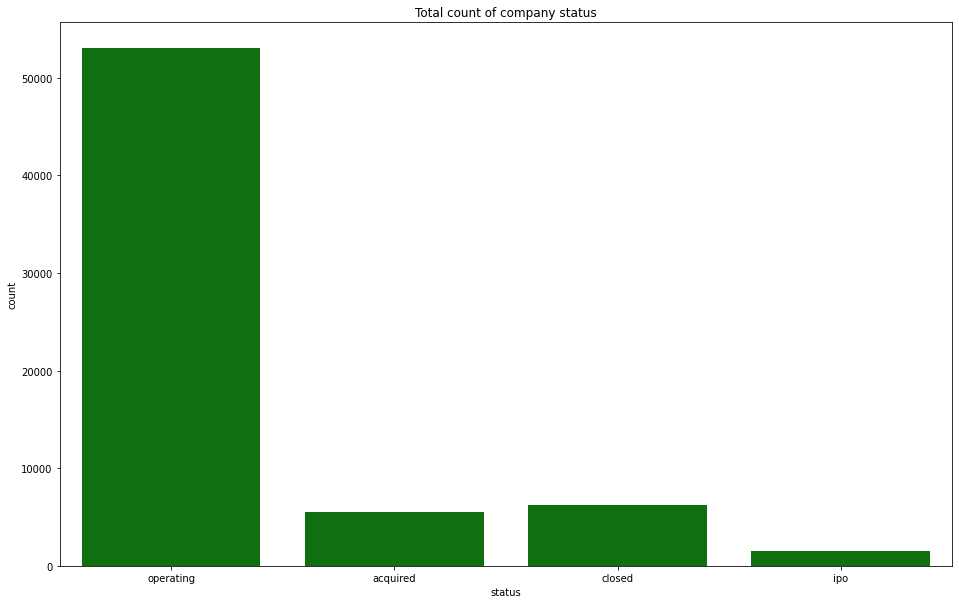

In [54]:
sns.countplot(x='status',data=df,color='green')
sns.set_style('whitegrid')
plt.title('Total count of company status')

**Observation :**

* Highest company status is operating around 55,000
* The 2nd highest status is closed is 8000 followed by acquired
* Lowest companies status is IPO they are near 2000 

**How many total companies are located in different countries**

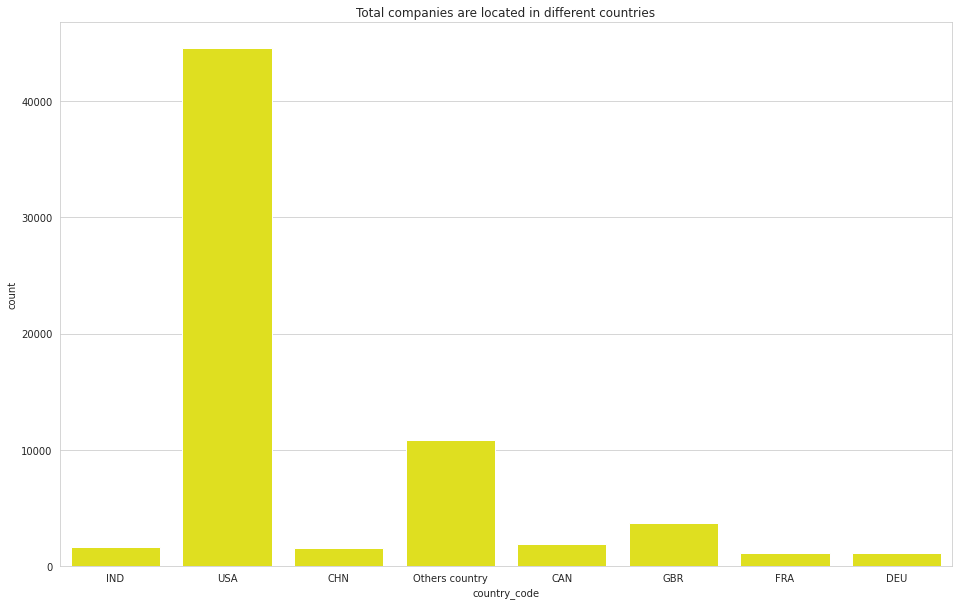

In [55]:
sns.countplot(x='country_code',data=df,color='yellow')
plt.title('Total companies are located in different countries')
plt.show()

**Observation :**

* In USA most of the companies are located total count is 46,000

* In GBR i.e United Kingdom(UK) their are total 4,000 companies are located

* In India,China & Canda their are same number of companies is around 2,000

* The Country code of DEU i.e Germany & france also 1,000 companies are located

**Which Countries how many companies are located by status wise**

In [56]:
# Which Countries how many companies are located

df1=df.groupby(['country_code','status'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')

df1=pd.pivot_table(df1,values=None,index=['country_code'],columns=['status'],fill_value=0,aggfunc=np.sum)
df1

name                       
status         acquired closed   ipo operating
country_code                                  
CAN                 156    158    81      1530
CHN                  33     66    81      1364
DEU                  90     77    14       901
FRA                  71     91    19       954
GBR                 227    281    32      3148
IND                  49     69    11      1467
Others country      467    938   160      9274
USA                4456   4557  1149     34395

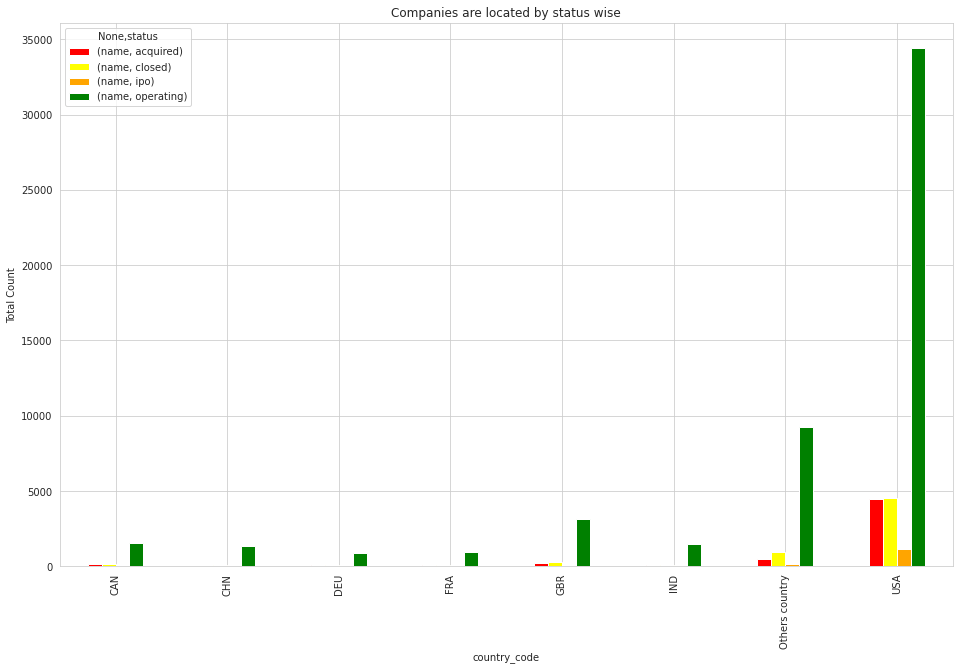

In [57]:
# Which Countries how many companies are located by status wise

df1.plot(kind='bar',color=['red','yellow','orange','green'])
plt.title('Companies are located by status wise')
plt.ylabel('Total Count')

plt.show()

**Observation :**

* Most comapanies status is operating & they are located in USA,UK & others countries

* Closed,Ipo & acquired also the most number of companies in USA

* The reamining countries India,China,Canda & france their most number of companies only operating


**Which Countries has most number of catgories**

In [58]:
df2=df.groupby(['country_code','category_list'])['name'].count()
df2.to_csv('country_code_category_list.csv')
df2=pd.read_csv('country_code_category_list.csv')
df2=pd.pivot_table(df2,values=None,index=['country_code'],columns=['category_list'],fill_value=0,aggfunc=np.sum)
df2

name                                                 \
category_list  Biotechnology Clean Technology Curated Web E-Commerce Mobile   
country_code                                                                  
CAN                      126               65          21         25     35   
CHN                       43               27          22        135    101   
DEU                       70               23          15         35     15   
FRA                       63               18          19         28     20   
GBR                      196               85          56         66     60   
IND                       17               23          24         78     27   
Others country           329              148         136        307    170   
USA                     2771              744         757        658    749   

                                        
category_list  Others Catgory Software  
country_code                            
CAN                      1472      181  
CHN                      1105      111  
DEU                       813      111  
FRA                       834      153  
GBR                      2923      302  
IND                      1309      118  
Others country           8928      821  
USA                     33533     5345

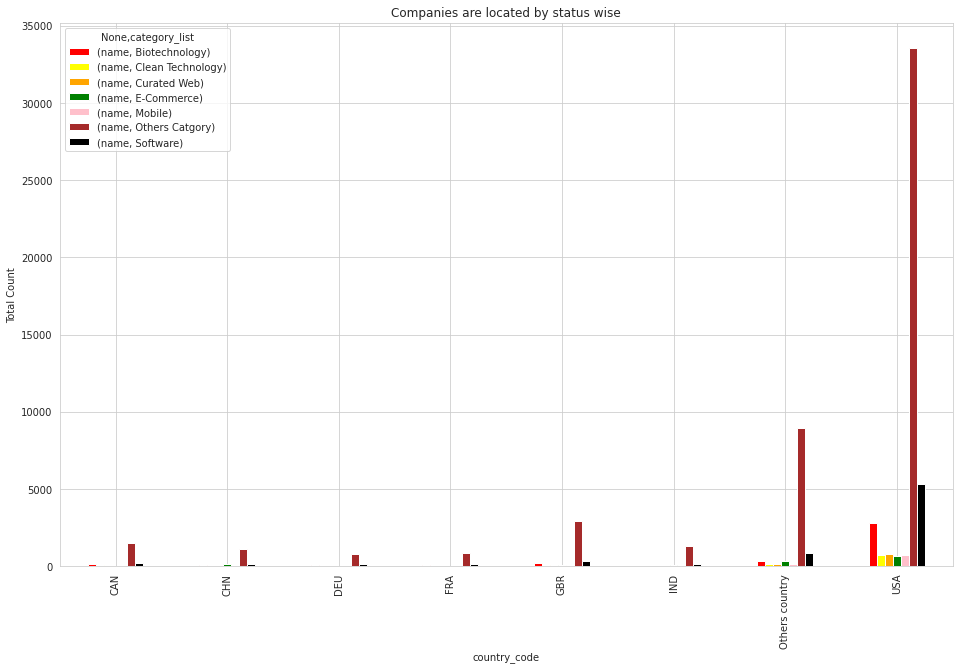

In [59]:
df2.plot(kind='bar',color=['red','yellow','orange','green','pink','brown','black'])
plt.title('Companies are located by status wise')
plt.ylabel('Total Count')

plt.show()

**Observation :**

* Most comapanies catgory is others & they are located in USA,UK & others countries.

* Biotechnology,Softare has most number of companies in USA.

* The reamining countries India,China,Canda & france their are most number of companies are software related.

In [60]:
# Visulizing the data by company wise in country statewise

import plotly.express as px


state = df.groupby(['state_code'])['name'].count().reset_index(name='counts')


fig = px.choropleth(state,
                    locations='state_code', 
                    locationmode ='USA-states',
                    title='Statewise Data',
                    color='counts',)
fig.show()

#**12. Conclusion :**

* That's all about EDA phases,
We reached the end of our exercise.

* By using visualizations and other methods, we have uncover patterns and relationships.

![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)